# Rejecting $H_o$ (Uniform Distribution), and further Assumptions

We aim to show that the distribution of synapses in each *bin* ($\theta_i$) is non-uniform.

$ F = \texttt{Multinomial}([\theta_0, \theta_1, \dots, \theta_n]) \in F_o$

- $H_o: \theta_0 = \theta_1 = \dots = \theta_n$: The distribution is uniform.
- $H_A: \theta_0 \ne \theta_1 \ne \dots \ne \theta_n$: The distribution is non-uniform.

<!-- $$\chi^2 = \frac{\|E_i - O_i\|^2_2}{E_i}$$ -->

In [4]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy
import csv

In [5]:
data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]
sorted_x = sorted(list(set([r[0] for r in rows])))
sorted_y = sorted(list(set([r[1] for r in rows])))
sorted_z = sorted(list(set([r[2] for r in rows])))

In [6]:
total = sum([r[4] for r in rows])

In [7]:
volume = numpy.zeros((len(sorted_x), len(sorted_y), len(sorted_z)))

# Emulate the Distribution

In [15]:
for r in range(total):
    volume[numpy.random.randint(len(sorted_x)), numpy.random.randint(len(sorted_y)), numpy.random.randint(len(sorted_z))] += 1

In [16]:
real_volume = numpy.zeros((len(sorted_x), len(sorted_y), len(sorted_z)))
for r in rows:
    real_volume[sorted_x.index(r[0]), sorted_y.index(r[1]), sorted_z.index(r[2])] = r[-1]

The diagram below is what our volume's max-intensity projection would look like if it were perfectly uniform. Qualitatively, it's clear that our data do not follow this distribution in space in any dimension:

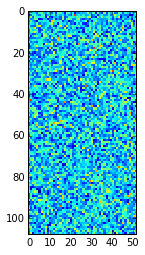

In [9]:
plt.imshow(numpy.amax(volume, axis=2), interpolation='nearest')
plt.show()

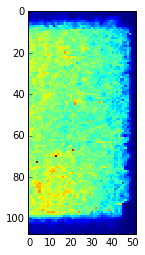

In [17]:
plt.imshow(numpy.amax(real_volume, axis=2), interpolation='nearest')
plt.show()

We make the following assumptions about our data:
    
- All supervoxels are the same realspace size
- We can discount the edges of our data, as we expect these areas to be under edge-effect
- The data is distributed in a non-uniform manner

## Formalization:

In [10]:
data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

In [11]:
unmaskedSynapses = ([r[-1] for r in rows if r[-2] != 0])
unmaskedSynapsesNoZero = ([r[-1] for r in rows if r[-2] != 0 if r[-1] !=0])

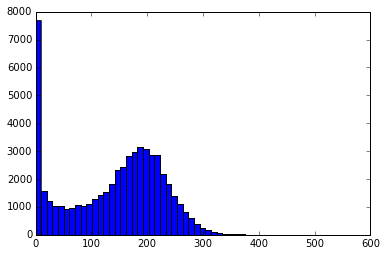

In [12]:
#including zeros
plt.hist(unmaskedSynapses, bins=50)
plt.show()

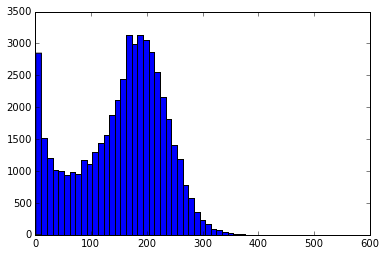

In [18]:
#throwing away zeros
plt.hist(unmaskedSynapsesNoZero, bins=50)
plt.show()

> At this point we are still hesitant to exclude 'masked' synapses from our calculations, so until we find otherwise, we intend to include both calculations for all supervoxels as well as, separately, unmasked voxels only (individually scaled based on their unmasked value, so a half-unmasked supervoxel — one with `unmasked` = 0.5 × max(`unmasked`) — is weighted as half of a supervoxel with a mask of 0.

At this point, it is obvious that our voxels do not follow a uniform distribution, both from comparing figures, and from comparing the figures above to that of a uniform distribution.

Next week, we will further characterize our data by performing analyses on subsamples, and trying to predict the rest of the volume.